Inicializacja wielowymiarowej liczby dualnej

In [1]:
struct Dual{T <:Number} <: Number
    v::T
    dv::Vector{T}
end


Rozmiar chunka -> długości wektora dv

In [2]:
chunk_leng=10

10

Załadowanie danych uczacych i testujących

In [3]:
using MLDatasets

# load full training set
train_x = MNIST.testtensor(Float64)
train_y = MNIST.testlabels()

# load full test set
test_x,  test_y_dig  = MNIST.testdata()

(FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N

Zmiana danych w bezie z jednej cyfry na 10 elementową tablicę zer i jedynek (np. 1 -> [1,0,0..])

In [4]:
function class2percentage(train_set :: Array{Int64, 1})
    train_set_per = zeros(Float64, length(train_set), 10)
    for i=1:length(train_set)
        train_set_per[i, train_set[i]+1] = 1
    end
    return train_set_per
end

class2percentage (generic function with 1 method)

In [5]:
train_set_per = class2percentage(train_y)
test_y = class2percentage(test_y_dig)

10000×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  

Operacje na liczbach dualnych

In [6]:
import Base: +, -, *, /
-(x::Dual) = Dual(-x.v,-x.dv)
+(x::Dual, y::Dual) = Dual( x.v + y.v, x.dv + y.dv)
-(x::Dual, y::Dual) = Dual( x.v - y.v, x.dv - y.dv)
+(x::Dual, y::Number) = Dual( x.v + y, x.dv)
-(x::Number, y::Dual) = Dual( y.v - x, y.dv)
+(x::Number, y::Dual) = Dual( y.v + x, y.dv)
-(x::Dual, y::Number) = Dual( x.v - y, x.dv)
*(x::Dual, y::Dual) = Dual( x.v * y.v, x.dv.* y.v + x.v.* y.dv)
*(x::Dual, y::Number) = Dual( x.v * y, x.dv.* y)
/(x::Dual, y::Dual) = Dual( x.v / y.v, (x.dv * y.v - x.v * y.dv)/y.v^2)
/(x::Dual, y::Number) = Dual( x.v / y, x.dv/y)
*(x::Number, y::Dual) = Dual( y.v * x, y.dv * x)
/(x::Number, y::Dual) = Dual( y.v / x, y.dv/x)

import Base: abs, sin, cos, tan, exp, sqrt, isless
abs(x::Dual) = Dual(abs(x.v),sign(x.v)*x.dv)
sin(x::Dual) = Dual(sin(x.v), cos(x.v)*x.dv)
cos(x::Dual) = Dual(cos(x.v),-sin(x.v)*x.dv)
tan(x::Dual) = Dual(tan(x.v), one(x.v)*x.dv + tan(x.v)^2*x.dv)
exp(x::Dual) = Dual(exp(x.v), exp(x.v)*x.dv)
sqrt(x::Dual) = Dual(sqrt(x.v),.5/sqrt(x.v) * x.dv)
isless(x::Dual, y::Dual) = x.v < y.v;

import Base: show
show(io::IO, x::Dual) = print(io, "(", x.v, ") + [", x.dv, "ϵ]");
value(x::Dual) = x.v;
partials(x::Dual) = x.dv;

import Base: convert, promote_rule

convert(::Type{Dual{T}}, x::Dual) where T =
Dual(convert(T, x.v), convert(Vector{T}, x.dv))

convert(::Type{Dual{T}}, x::Number, len::Number) where T =
Dual(convert(T, x), zeros(T,len))

convert(::Type{Dual{T}}, x::Number) where T =
Dual(convert(T, x), zeros(T,chunk_leng))

promote_rule(::Type{Dual{T}}, ::Type{R}) where {T,R} =
Dual{promote_type(T,R)}


promote_rule (generic function with 141 methods)

Jakobian dla liczb wielowymiarowych. Różniczkowanie w przód.

In [7]:
J = function jacobian(f, chunk_leng, args::Vector{T}) where {T <:Number}
    jacobian_columns = Matrix{T}[]
    for i=1:ceil(length(args)/chunk_leng)
        x = Dual{T}[]
        for j=1:length(args)
            seed = (j > (i-1) * chunk_leng && j <= i*chunk_leng)
            if seed
                oney = zeros(Float64, chunk_leng)
                index = mod(j -1, chunk_leng)
                oney[index + 1] = 1
                push!(x, Dual(args[j], oney))
            else
                push!(x, Dual(args[j], zeros(Float64, chunk_leng)))
            end

        end
        column = partials.(f(x))
        println("===============")
        println(column)
        println("===============")
#         println(typeof(column))
#         println(typeof(column[:,:]))
        push!(jacobian_columns, column[:,:])
#         println(typeof(jacobian_columns))
    end
    hjacobian = hcat(jacobian_columns...)
    return hjacobian
end

jacobian (generic function with 1 method)

Algorytm optymalizacyjny -> Algorytm Adagrad

In [8]:
abstract type DescentMethod end
struct GradientDescent <: DescentMethod
 α # learning rate
end

In [9]:
mutable struct Adagrad <: DescentMethod
 α # learning rate
 ϵ # small value
 s # sum of squared gradient
 Adagrad() = new() # new uninitialized structure
end

function init!(M::Adagrad, θ, α=0.01, ϵ=1e-8)
 M.α = α
 M.ϵ = ϵ
 M.s = zero(θ)
 return M
end

init! (generic function with 3 methods)

In [10]:
function softmax!(y)
    sum_y = sum(exp.(y))
    for i=1:length(y)
        y[i] = exp.(y[i]) ./sum_y
    end
end

softmax! (generic function with 1 method)

Inicjalizacja dwóch warstw sieci.

In [11]:
Wh= randn(30, 784)
Wo= randn(10, 30)

10×30 Array{Float64,2}:
  1.16217     0.935446   -0.076699  …   0.15037     0.837078  -1.28799
 -0.504546    1.72651     0.193259      0.0274288   0.297143   0.346772
 -0.780247   -1.29319    -0.380419      0.0922777  -1.16654    1.85413
 -1.76988    -0.100525    0.147284      0.189919   -0.235604  -0.0136021
  0.559544   -0.0136277  -2.36244       0.462575   -1.71856   -0.647552
 -0.455587   -0.779851    1.66672   …  -1.71728    -0.46588    0.742146
  0.0496391   0.457911    0.523638     -0.374855   -0.626983   0.825131
  0.142106   -0.625291   -1.11856       0.832227   -0.341743   1.50369
 -0.312538   -0.406415    0.691315     -2.02621    -1.33702    0.801031
 -0.86006    -0.111564   -0.36851       0.0202246   0.847948  -1.19874

In [17]:
batch_size = 1000
epoch = 200

dense(w, n, m, v, f) = f.(reshape(w, n, m) * v)
mean_squared_loss(y, ŷ) = sum(0.5(y - ŷ).^2)
σ(x)= one(x) / (one(x) + exp(-x))
linear(x) = x

y_pred = []
dWh = similar(Wh)
dWo = similar(Wo)
step_val = similar(Wh)
step_val = similar(Wo)

x_conv = Array{Dual{Float64}}(undef, 784, 1) 
E = Array{Float64, 2}(undef, epoch, 10)

function net(x, wh, wo, y, chun_len)
    d =reshape(wh, 30,784)
    x̂ = dense(d, 30, 784, x, linear)
    ŷ = dense(wo, 10, 30, x̂ , σ)
    softmax!(ŷ)
    push!(y_pred, ŷ)
    E = mean_squared_loss(y, ŷ)
    println(E)
    return E
end
dnet_Wh(x, wh, wo, y) = J(w -> net(x, w, wo, y, chunk_leng), chunk_leng, wh);
dnet_Wo(x, wh, wo, y) = J(w -> net(x, wh, w, y, chunk_leng), chunk_leng, wo); 

x = train_x[:,:,1]
m = Adagrad()
Mh = init!(m, Wh)
m1 = Adagrad()
Mo = init!(m1, Wo)

for i=1:epoch
    println(i)
    x = train_x[:,:,i]
    x = x[:]
    y = train_set_per[i, :]
    dWh[:] = dnet_Wh(x, Wh[:], Wo[:], y)
    dWo[:] = dnet_Wo(x, Wh[:], Wo[:], y)

    α, ϵ, s, g = Mh.α, Mh.ϵ, Mh.s, dWh
    s += g.*g
    Mh.s = s
    step_val = - α*g ./ (sqrt.(s) .+ ϵ)
    Wh = Wh - step_val

    oα, oϵ, os, og = Mo.α, Mo.ϵ, Mo.s, dWo
    os += og.*og
    Mo.s = os
    step_valo = - oα*og ./ (sqrt.(os) .+ oϵ)
    Wo = Wo - step_valo

    Ei = net(x, Wh[:], Wo[:], y, chunk_leng)
    E[i]= Ei
end
    

1
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0,

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[2.4287227263366776e-6, 1.9294916512809704e-6, -1.8418285146642702e-7, -3.1712014048572022e-6, 1.6299044845994463e-6, -3.759702993096148e-7, 3.3633350957904194e-6, 8.333559471892426e-7, -2.524623920308901e-6, 1.1104045046792239e-6]ϵ]
[2.4287227263366776e-6, 1.9294916512809704e-6, -1.8418285146642702e-7, -3.1712014048572022e-6, 1.6299044845994463e-6, -3.759702993096148e-7, 3.3633350957904194e-6, 8.333559471892426e-7, -2.524623920308901e-6, 1.1104045046792239e-6]
(0.4397191229570834) + [[1.345563502766894e-6, -3.1938205290606442e-6, -7.470057846452883e-7, -3.5949552082891863e-7, -2.74736

(0.4397191229570834) + [[1.2000971781434458e-6, -2.848542634027061e-6, -6.662484025214737e-7, -3.206311401987652e-7, -2.4503543988646676e-6, -1.5222920951257323e-6, 4.336635450470672e-7, -2.1063328905607753e-6, -2.906322105588752e-7, 1.2172359439023641e-6]ϵ]
[1.2000971781434458e-6, -2.848542634027061e-6, -6.662484025214737e-7, -3.206311401987652e-7, -2.4503543988646676e-6, -1.5222920951257323e-6, 4.336635450470672e-7, -2.1063328905607753e-6, -2.906322105588752e-7, 1.2172359439023641e-6]
(0.4397191229570834) + [[1.0624438927119714e-7, 5.372485523800266e-7, 8.416768058838829e-7, -3.30481105007774e-7, -5.58106339292911e-7, -1.5805103845947723e-7, 1.8031347097426094e-6, 2.295482607760415e-7, 1.4932951858116595e-6, -2.3310487601347456e-6]ϵ]
[1.0624438927119714e-7, 5.372485523800266e-7, 8.416768058838829e-7, -3.30481105007774e-7, -5.58106339292911e-7, -1.5805103845947723e-7, 1.8031347097426094e-6, 2.295482607760415e-7, 1.4932951858116595e-6, -2.3310487601347456e-6]
(0.4397191229570834) + [[2

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[6.909650419613779e-7, -1.6400700014095204e-6, -3.8359756508812115e-7, -1.8460580799322845e-7, -1.4108101084372333e-6, -8.764712062845126e-7, 2.4968507139073563e-7, -1.2127371188077198e-6, -1.673336969884433e-7, 7.008328161862093e-7]ϵ]
[6.909650419613779e-7, -1.6400700014095204e-6, -3.8359756508812115e-7, -1.8460580799322845e-7, -1.4108101084372333e-6, -8.764712062845126e-7, 2.4968507139073563e-7, -1.2127371188077198e-6, -1.673336969884433e-7, 7.008328161862093e-7]
(0.4397191229570834) + [[6.117101200462867e-8, 3.0932492409759105e-7, 4.846017973270841e-7, -1.9027699985296075e-7, -3.2133395292622144e-7, -9.099908274939599e-8, 1.0381684692457445e-6, 1.3216415014378141e-7, 8.597760160733799e-7, -1.3421189831078832e-6]ϵ]
[6.117101200462867e-8, 3.0932492409759105e-7, 4.846017973270841e-7, -1.9027699985296075e-7, -3.2133395292622144e-7, -9.099908274939599e-8, 1.0381684692457445e-6, 1.3216415014378141e-7, 8.597760160733799e-7, -1.3421189831078832e-6]
(0.439719122957083

(0.4397191229570834) + [[1.3629330744890945e-7, 6.891976379016505e-7, 1.0797268115884155e-6, -4.2395050844431603e-7, -7.159545968707039e-7, -2.0275234226619798e-7, 2.3131122034071847e-6, 2.9447100119754804e-7, 1.915641298970513e-6, -2.9903352781526534e-6]ϵ]
[1.3629330744890945e-7, 6.891976379016505e-7, 1.0797268115884155e-6, -4.2395050844431603e-7, -7.159545968707039e-7, -2.0275234226619798e-7, 2.3131122034071847e-6, 2.9447100119754804e-7, 1.915641298970513e-6, -2.9903352781526534e-6]
(0.4397191229570834) + [[2.7788088850879105e-6, 2.207616573988138e-6, -2.1073173095708308e-7, -3.6283115172690505e-6, 1.864845671568737e-6, -4.301642163272172e-7, 3.848140154643095e-6, 9.534793269642682e-7, -2.888533674587659e-6, 1.2704628116600128e-6]ϵ]
[2.7788088850879105e-6, 2.207616573988138e-6, -2.1073173095708308e-7, -3.6283115172690505e-6, 1.864845671568737e-6, -4.301642163272172e-7, 3.848140154643095e-6, 9.534793269642682e-7, -2.888533674587659e-6, 1.2704628116600128e-6]
(0.4397191229570834) + [[1

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

[7.22052702424418e-7, 5.736326530835319e-7, -5.475706394947827e-8, -9.427896068494388e-7, 4.8456619812416e-7, -1.1177495384880449e-7, 9.999104338836383e-7, 2.4775447078599104e-7, -7.505638681999428e-7, 3.3012025814787753e-7]
(0.4397191229570834) + [[4.0003239271448204e-7, -9.495142113423533e-7, -2.220828008404912e-7, -1.0687704673292176e-7, -8.167847996215559e-7, -5.07430698375244e-7, 1.445545150156891e-7, -7.021109635202585e-7, -9.687740351962502e-8, 4.0574531463412125e-7]ϵ]
[4.0003239271448204e-7, -9.495142113423533e-7, -2.220828008404912e-7, -1.0687704673292176e-7, -8.167847996215559e-7, -5.07430698375244e-7, 1.445545150156891e-7, -7.021109635202585e-7, -9.687740351962502e-8, 4.0574531463412125e-7]
(0.4397191229570834) + [[3.541479642373239e-8, 1.7908285079334223e-7, 2.805589352946276e-7, -1.1016036833592468e-7, -1.860354464309703e-7, -5.26836794864924e-8, 6.010449032475365e-7, 7.651608692534711e-8, 4.977650619372201e-7, -7.770162533782487e-7]ϵ]
[3.541479642373239e-8, 1.790828507933

(0.4397191229570834) + [[1.1596604008634593e-6, 9.212888064674908e-7, -8.794316331279843e-8, -1.5141772473642498e-6, 7.782426818357718e-7, -1.795173501208072e-7, 1.6059167574494804e-6, 3.9790869550477316e-7, -1.2054510610483929e-6, 5.301931418738636e-7]ϵ]
[1.1596604008634593e-6, 9.212888064674908e-7, -8.794316331279843e-8, -1.5141772473642498e-6, 7.782426818357718e-7, -1.795173501208072e-7, 1.6059167574494804e-6, 3.9790869550477316e-7, -1.2054510610483929e-6, 5.301931418738636e-7]
(0.4397191229570834) + [[6.424762670868953e-7, -1.5249773697316598e-6, -3.5667843771351624e-7, -1.7165101444984406e-7, -1.3118058903012865e-6, -8.149644549663011e-7, 2.321633119948947e-7, -1.1276327595931428e-6, -1.5559098141030693e-7, 6.516515659275281e-7]ϵ]
[6.424762670868953e-7, -1.5249773697316598e-6, -3.5667843771351624e-7, -1.7165101444984406e-7, -1.3118058903012865e-6, -8.149644549663011e-7, 2.321633119948947e-7, -1.1276327595931428e-6, -1.5559098141030693e-7, 6.516515659275281e-7]
(0.4397191229570834)

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[2.4068423414147257e-7, 1.9121088436117726e-7, -1.82523546498261e-8, -3.14263202

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[6.921982937365876e-8, 3.500255720051688e-7, 5.48365191712227e-7, -2.1531344720203448e-7, -3.636147362059875e-7, -1.0297264626905334e-7, 1.1747695836201844e-6, 1.4955416989954213e-7, 9.729044392409298e-7, -1.5187135861483944e-6]ϵ]
[6.921982937365876e-8, 3.500255720051688e-7, 5.48365191712227e-7, -2.1531344720203448e-7, -3.636147362059875e-7, -1.0297264626905334e-7, 1.1747695836201844e-6, 1.4955416989954213e-7, 9.729044392409298e-7, -1.5187135861483944e-6]
(0.4397191229570834) + [[2.7788088850879105e-6, 2.207616573988138e-6, -2.1073173095708308e-7, -3.6283115172690505e-6, 1.864845671568737e-6, -4.301642163272172e-7, 3.848140154643095e-6, 9.534793269642682e-7, -2.888533674587659e-6, 1.2704628116600128e-6]ϵ]
[2.7788088850879105e-6, 2.207616573988138e-6, -2.1073173095708308e-7, -3.6283115172690505e-6, 1.864845671568737e-6, -4.301642163272172e-7, 3.848140154643095e-6, 9.534793269642682e-7, -2.888533674587659e-6, 1.2704628116600128e-6]
(0.4397191229570834) + [[1.53951

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[6.782919325805135e-7, 5.38867037745136e-7, -5.143845401314625e-8, -8.856508427979573e-7, 4.5519854975299866e-7, -1.0500071422160422e-7, 9.393098015270543e-7, 2.3273904831411268e-7, -7.050751489150979e-7, 3.101129697752787e-7]ϵ]
[6.782919325805135e-7, 5.38867037745136e-7, -5.143845401314625e-8, -8.856508427979573e-7, 4.5519854975299866e-7, -1.0500071422160422e-7, 9.393098015270543e-7, 2.3273904831411268e-7, -7.050751489150979e-7, 3.101129697752787e-7]
(0.4397191229570834) + [[3.7578800527724063e-7, -8.919678955034229e-7, -2.0862323715318873e-7, -1.0039964996122955e-7, -7.672826905535829e-7, -4.766773227161387e-7, 1.3579363531776857e-7, -6.595587839129703e-7, -9.100604573055691e-8, 3.811546895047807e-7]ϵ]
[3.7578800527724063e-7, -8.919678955034229e-7, -2.0862323715318873e-7, -1.0039964996122955e-7, -7.672826905535829e-7, -4.766773227161387e-7, 1.3579363531776857e-7, -6.595587839129703e-7, -9.100604573055691e-8, 3.811546895047807e-7]
(0.4397191229570834) + [[3.326

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[9.84617321487842e-8, 7.822263451139068e-8, -7.466872356747034e-9, -1.2856221911583243e-7, 6.60772088351127e-8, -1.524203916120061e-8, 1.3635142280231432e-7, 3.378470056172603e-8, -1.0234961839090126e-7, 4.5016398838346914e-8]ϵ]
[9.84617321487842e-8, 7.822263451139068e-8, -7.466872356747034e-9, -1.2856221911583243e-7, 6.60772088351127e-8, -1.524203916120061e-8, 1.3635142280231432e-7, 3.378470056172603e-8, -1.0234961839090126e-7, 4.5016398838346914e-8]
(0.4397191229570834) + [[5.4549871733793e-8, -1.2947921063759369e-7, -3.028401829643061e-8, -1.4574142736307513e-8, -1.1137974540293943e-7, -6.919509523298783e-8, 1.9711979320321237e-8, -9.574240411639886e-8, -1.3210555025403425e-8, 5.5328906541016535e-8]ϵ]
[5.4549871733793e-8, -1.2947921063759369e-7, -3.028401829643061e-8, -1.4574142736307513e-8, -1.1137974540293943e-7, -6.919509523298783

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[9.765898407756509e-8, 4.938345279452769e-7, 7.736625185397306e-7, -3.0377556116876187e-7, -5.130068371278273e-7, -1.4527923737184267e-7, 1.657426854409874e-6, 2.1099890636989664e-7, 1.372624867766273e-6, -2.1426811835581997e-6]ϵ]
[9.765898407756509e-8, 4.938345279452769e-7, 7.736625185397306e-7, -3.0377556116876187e-7, -5.130068371278273e-7, -1.4527923737184267e-7, 1.657426854409874e-6, 2.1099890636989664e-7, 1.372624867766273e-6, -2.1426811835581997e-6]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[1.1516084032689634e-7, -2.7334500023492005e-7, -6.393292751468687e-8, -3.076763466553808e-8, -2.351350180728721e-7, -1.4607853438075208e-7, 4.161417856512263e-8, -2.0212285313461994e-7, -2.788894949807388e-8, 1.1680546936436831e-7]ϵ]
[1.1516084032689634e-7, -2.7334500023492005e-7, -6.393292751468687e-8, -3.076763466553808e-8, -2.351350180728721e-7, -1.4607853438075208e-7, 4.161417856512263e-8, -2.0212285313461994e-7, -2.788894949807388e-8, 1.1680546936436831e-7]
(0.4397191229570834) + [[1.0195168667438112e-8, 5.155415401626519e-8, 8.076696622118068e-8, -3.171283330882679e-8, -5.355565882103692e-8, -1.5166513791565987e-8, 1.7302807820762405e-7, 2.20273583572969e-8, 1.432960026788966e-7, -2.236864971846472e-7]ϵ]
[1.0195168667438112e-8, 5.155415401626519e-8, 8.076696622118068e-8, -3.171283330882679e-8, -5.355565882103692e-8, -1.5166513791565987e-8, 1.7302807820762405e-7, 2.20273583572969e-8, 1.432960026788966e-7, -2.236864971846472e-7]
(0.4397191229570834) + [[2.4

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[1.3629330744890945e-7, 6.891976379016505e-7, 1.0797268115884155e-6, -4.2395050844431603e-7, -7.159545968707039e-7, -2.0275234226619798e-7, 2.3131122034071847e-6, 2.9447100119754804e-7, 1.915641298970513e-6, -2.9903352781526534e-6]ϵ]
[1.3629330744890945e-7, 6.891976379016505e-7, 1.0797268115884155e-6, -4.2395050844431603e-7, -7.159545968707039e-7, -2.0275234226619798e-7, 2.3131122034071847e-6, 2.9447100119754804e-7, 1.915641298970513e-6, -2.9903352781526534e-6]
(0.4397191229570834) + [[2.3959021489537497e-6, 1.9034174397771732e-6, -1.8169389401417782e-7, -3.1283473318185917e-6, 1.6078787483210762e-6, -3.708896195892147e-7, 3.3178846215229823e-6, 8.220943803353333e-7, -2.4905073808452646e-6, 1.0953990383997748e-6]ϵ]
[2.3959021489537497e-6, 1.9034174397771732e-6, -1.8169389401417782e-7, -3.1283473318185917e-6, 1.6078787483210762e-6, -3.708896195892147e-7, 3.3178846215229823e-6, 8.220943803353333e-7, -2.4905073808452646e-6, 1.0953990383997748e-6]
(0.439719122957083

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[3.3914596629025674e-7, 2.69433518872568e-7, -2.5719227006573124e-8, -4.4282542139897863e-7, 2.2759927487649933e-7, -5.250035711080211e-8, 4.6965490076352716e-7, 1.1636952415705634e-7, -3.5253757445754893e-7, 1.5505648488763935e-7]ϵ]
[3.3914596629025674e-7, 2.69433518872568e-7, -2.5719227006573124e-8, -4.4282542139897863e-7, 2.2759927487649933e-7, -5.250035711080211e-8, 4.6965490076352716e-7, 1.1636952415705634e-7, -3.5253757445754893e-7, 1.5505648488763935e-7]
(0.4397191229570834) + [[1.8789400263862031e-7, -4.4598394775171146e-7, -1.0431161857659436e-7, -5.019982498061478e-8, -3.8364134527679144e-7, -2.3833866135806935e-7, 6.789681765888429e-8, -3.2977939195648516e-7, -4.5503022865278455e-8, 1.905773447523903

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[2.7788088850879105e-6, 2.207616573988138e-6, -2.1073173095708308e-7, -3.6283115172690505e-6, 1.864845671568737e-6, -4.301642163272172e-7, 3.848140154643095e-6, 9.534793269642682e-7, -2.888533674587659e-6, 1.2704628116600128e-6]ϵ]
[2.7788088850879105e-6, 2.207616573988138e-6, -2.1073173095708308e-7, -3.6283115172690505e-6, 1.864845671568737e-6, -4.301642163272172e-7, 3.848140154643095e-6, 9.534793269642682e-7, -2.888533674587659e-6, 1.2704628116600128e-6]
(0.4397191229570834) + [[1.5395186022648257e-6, -3.6541910557720874e-6, -8.546822941437084e-7, -4.1131469500245643e-7, -3.1433839258162927e-6, -1.952839354353212e-6, 5.563158608179547e-7, -2.7020634050628135e-6, -3.728312196058299e-7, 1.5615046957131344e-6]ϵ]
[1.5395186022648257e-6, -3.6541910557720874e-6, -8.546822941437084e-7, -4.1131469500245643e-7, -3.1433839258162927e-6, -1.952839354353212e-6, 5.563158608179547e-7, -2.7020634050628135e-6, -3.728312196058299e-7, 1.5615046957131344e-6]
(0.4397191229570834) +

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[1.323763287778099e-6, 1.051659863986475e-6, -1.0038795057404344e-7, -1.7284476125573038e-6, 8.883713632276265e-7, -2.0492074872280826e-7, 1.8331691287866712e-6, 4.542165297743166e-7, -1.3760337583665619e-6, 6.052204732711083e-7]ϵ]
[1.323763287778099e-6, 1.051659863986475e-6, -1.0038795057404344e-7, -1.7284476125573038e-6, 8.883713632276265e-7, -2.0492074872280826e-7, 1.8331691287866712e-6, 4.542165297743166e-7, -1.3760337583665619e-6, 6.052204732711083e-7]
(0.4397191229570834) + [[7.333927199765503e-7, -1.7407760541276475e-6, -4.0715180154090043e-7, -1.9594125234368998e-7, -1.49743879

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.4397191229570834) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0

(0.4397191229570834) + [[1.5363656869523264e-5, 4.803956591894117e-10, 2.9011029972126706e-19, 1.40957327764474e-17, 1.6445315006040232e-14, 1.0714019591934412e-12, 3.253733833598857e-58, -6.514124599979644e-15, 2.5646540347697866e-17, 7.831403088088669e-10]ϵ]
[1.5363656869523264e-5, 4.803956591894117e-10, 2.9011029972126706e-19, 1.40957327764474e-17, 1.6445315006040232e-14, 1.0714019591934412e-12, 3.253733833598857e-58, -6.514124599979644e-15, 2.5646540347697866e-17, 7.831403088088669e-10]
(0.4397191229570834) + [[2.6400471688322646e-5, 8.254982591274638e-10, 4.985173008826622e-19, 2.42217069315678e-17, 2.8259162314654373e-14, 1.8410667024599835e-12, 5.591123824540975e-58, -1.1193686733339877e-14, 4.407028665785555e-17, 1.3457260681020603e-9]ϵ]
[2.6400471688322646e-5, 8.254982591274638e-10, 4.985173008826622e-19, 2.42217069315678e-17, 2.8259162314654373e-14, 1.8410667024599835e-12, 5.591123824540975e-58, -1.1193686733339877e-14, 4.407028665785555e-17, 1.3457260681020603e-9]
(0.4397191

(0.4397191229570834) + [[-4.637317809584649e-6, -1.4500111301140657e-10, -8.756597931512629e-20, -4.254611594003525e-18, -4.963802095386582e-15, -3.233885935351407e-13, -9.820967743771482e-59, 1.966202856382618e-15, -7.741070977999588e-18, -2.3638060471443427e-10]ϵ]
[-4.637317809584649e-6, -1.4500111301140657e-10, -8.756597931512629e-20, -4.254611594003525e-18, -4.963802095386582e-15, -3.233885935351407e-13, -9.820967743771482e-59, 1.966202856382618e-15, -7.741070977999588e-18, -2.3638060471443427e-10]
(0.4397191229570834) + [[-1.7276707663718134e-5, -5.402135336150718e-10, -3.262342345369959e-19, -1.585090428357948e-17, -1.849305163542945e-14, -1.2048107163886641e-12, -3.658882044557187e-58, 7.325249929405338e-15, -2.8839994536188644e-17, -8.806553211823051e-10]ϵ]
[-1.7276707663718134e-5, -5.402135336150718e-10, -3.262342345369959e-19, -1.585090428357948e-17, -1.849305163542945e-14, -1.2048107163886641e-12, -3.658882044557187e-58, 7.325249929405338e-15, -2.8839994536188644e-17, -8.806

Excessive output truncated after 524288 bytes.

0.49941445801776757) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.49941445801776757) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.49941445801776757) + [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]ϵ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(0.49941445801776757) + [[0.0, 0.0, 0.0, 0.0, 0.0

## Testy

In [14]:
y_predicted_list = Int64[]

0-element Array{Int64,1}

In [15]:
test_len = 100
dense(w, n, m, v, f) = f.(reshape(w, n, m) * v)
mean_squared_loss(y, ŷ) = sum(0.5(y - ŷ).^2)
σ(x)= one(x) / (one(x) + exp(-x))
linear(x) = x
E_test = Array{Float64, 2}(undef, test_len, 10)

function net(x, wh, wo, y)
    x̂ = dense(wh, 30, 784, x, σ)
    ŷ = dense(wo, 10, 30, x̂ , linear)
    softmax!(ŷ)
    println(y)
    println(ŷ)
    E = mean_squared_loss(y, ŷ)
    return ŷ, E
end

for i=1:test_len
    x = test_x[:,:,i]
    x = x[:]
    y = test_y[i,:]
    y_predicted, Ei = net(x, Wh[:], Wo[:], y)
    println(y_predicted)
    println("==========")
    println("oczekiwana wartość:", test_y_dig[i], "co wyszło:", argmax(y_predicted)-1)
    push!(y_predicted_list, argmax(y_predicted)-1)
    println(Ei)
    E_test[i]= Ei
end
println(y_predicted_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.001401894141511676, 0.006677118965927346, 0.0008222599764976378, 0.0003311939925436045, 0.055254911405168416, 0.034595048495619375, 0.22680800343190663, 0.555373486844498, 0.03875878242724295, 0.07997730031908429]
[0.001401894141511676, 0.006677118965927346, 0.0008222599764976378, 0.0003311939925436045, 0.055254911405168416, 0.034595048495619375, 0.22680800343190663, 0.555373486844498, 0.03875878242724295, 0.07997730031908429]
oczekiwana wartość:7co wyszło:7
0.13066523802188248
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.012811482593068751, 0.03251240782157684, 0.00024882229256235097, 0.08221783870600587, 0.6719346320230122, 0.017002696647567046, 0.021537028934491435, 0.08305082656161585, 0.02906943477644729, 0.04961482964365239]
[0.012811482593068751, 0.03251240782157684, 0.00024882229256235097, 0.08221783870600587, 0.6719346320230122, 0.017002696647567046, 0.021537028934491435, 0.08305082656161585, 0.02906943477644729, 0

[0.0031514468201719868, 0.0068226872030956705, 3.2540110675000083e-6, 0.08243773979625987, 0.16176841970041866, 0.012196610335859328, 0.012846341010550252, 0.33259734718006434, 0.05946004760328649, 0.32871610633922593]
oczekiwana wartość:3co wyszło:7
0.545335280305477
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.02644565742586241, 0.0025484789821665684, 0.0014455743594448823, 0.0027679569599007164, 0.0088419921338036, 0.004406091419739261, 0.4458973458588281, 0.362343406849167, 0.1402687805231089, 0.005034715487978603]
[0.02644565742586241, 0.0025484789821665684, 0.0014455743594448823, 0.0027679569599007164, 0.0088419921338036, 0.004406091419739261, 0.4458973458588281, 0.362343406849167, 0.1402687805231089, 0.005034715487978603]
oczekiwana wartość:4co wyszło:6
0.6664735478460743
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.001512294684318948, 0.048387122705723346, 8.123954659967635e-5, 0.000255992086272743, 0.39492848192064295, 0.14661752119940608, 0.01404350190614224

[0.014975005748475092, 0.04521554578682848, 1.7012533786517604e-5, 0.000978150251410939, 0.008853617758971503, 0.02681234690716079, 0.006135446536350456, 0.296065783423711, 0.5864060548717084, 0.01454103618159673]
[0.014975005748475092, 0.04521554578682848, 1.7012533786517604e-5, 0.000978150251410939, 0.008853617758971503, 0.02681234690716079, 0.006135446536350456, 0.296065783423711, 0.5864060548717084, 0.01454103618159673]
oczekiwana wartość:1co wyszło:8
0.6722059725538373
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.3646773691164896, 0.025255460923112486, 3.476220941410034e-6, 0.0004112490246031734, 0.01494156347488939, 0.0033073053074749465, 0.00038152393749820633, 0.01619373959167199, 0.558089625482099, 0.01673868692122]
[0.3646773691164896, 0.025255460923112486, 3.476220941410034e-6, 0.0004112490246031734, 0.01494156347488939, 0.0033073053074749465, 0.00038152393749820633, 0.01619373959167199, 0.558089625482099, 0.01673868692122]
oczekiwana wartość:2co wyszło:8
0.72293071

oczekiwana wartość:0co wyszło:8
0.6780876139808301
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0005309050434227726, 0.0033707919524318384, 0.0002469613279003028, 0.00047116743108481025, 0.08719251867065982, 0.3573499588203799, 0.005588083880788713, 0.16394413072457628, 0.3811010770209866, 0.00020440512776908584]
[0.0005309050434227726, 0.0033707919524318384, 0.0002469613279003028, 0.00047116743108481025, 0.08719251867065982, 0.3573499588203799, 0.005588083880788713, 0.16394413072457628, 0.3811010770209866, 0.00020440512776908584]
oczekiwana wartość:4co wyszło:8
0.5665376977477231
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.012564237189633273, 0.1690238974969026, 9.490486387204136e-5, 0.001159852534998237, 0.04375156167716046, 0.1463332917376356, 0.019717255534937153, 0.23805084783682545, 0.36221359709811646, 0.007090554029918682]
[0.012564237189633273, 0.1690238974969026, 9.490486387204136e-5, 0.001159852534998237, 0.04375156167716046, 0.1463332917376356, 0.01971725

[0.00735533501114584, 0.06484630882521154, 3.859001523324417e-5, 0.0007192886784679056, 0.002817332530990904, 0.013212854483040487, 0.0034035922603952436, 0.2663851908115136, 0.6337565436933732, 0.007464963690628259]
oczekiwana wartość:1co wyszło:8
0.6737126497517824
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.002786972165301153, 0.010039757602171438, 7.207708562283441e-6, 7.176741983165046e-5, 0.0009146257601516655, 0.020734044700566095, 0.004207670422474646, 0.9575601245572715, 0.0033562559153606395, 0.0003215737483090756]
[0.002786972165301153, 0.010039757602171438, 7.207708562283441e-6, 7.176741983165046e-5, 0.0009146257601516655, 0.020734044700566095, 0.004207670422474646, 0.9575601245572715, 0.0033562559153606395, 0.0003215737483090756]
oczekiwana wartość:7co wyszło:7
0.001184760840211908
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.07504157965509477, 0.0027139738830429835, 1.1800146519744409e-7, 0.0003716711702120509, 0.6312537720132226, 0.001520561460286456, 

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.009930177165834211, 0.0013681559298474016, 2.147993689451342e-6, 0.00036766579594537253, 0.8952379776909575, 0.0017873989626335733, 0.017893224822519673, 0.03882713322684281, 0.013959717448495312, 0.020626400963234637]
[0.009930177165834211, 0.0013681559298474016, 2.147993689451342e-6, 0.00036766579594537253, 0.8952379776909575, 0.0017873989626335733, 0.017893224822519673, 0.03882713322684281, 0.013959717448495312, 0.020626400963234637]
oczekiwana wartość:3co wyszło:4
0.9016337756262015
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.056514536538487266, 0.005923533507608649, 6.326013971409694e-6, 0.0017878304154314323, 0.011058637809692299, 0.009317467141644192, 0.10573066443017778, 0.04089404371553841, 0.6901474523351561, 0.07861950809229233]
[0.056514536538487266, 0.005923533507608649, 6.326013971409694e-6, 0.0017878304154314323, 0.011058637809692299, 0.009317467141644192, 0.10573066443017778, 0.04089404371553841, 0.69014745

In [41]:
open("myfile.txt", "w") do io
    for i=1:test_len
           write(io, "WH \n")
           write(io, Wh)
           write(io, "Wo \n")
           write(io, Wo)
           write(io, 'E uczące \n')
           write(io, E_test)
       end;

LoadError: [91msyntax: invalid character literal[39m

In [ ]:
open("myfile.txt", "w") do io
    for i=1:test_len
           write(io, y_predicted_list[i])
           write(io, "==")
           write(io, test_y[i,:])
           write(io, '\n')
       end;

1:100
100
100


┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/martika/.julia/packages/Plots/uCh2y/src/backends/hdf5.jl", 162, UndefVarError(:HDF5Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f33e05cf843, Ptr{Nothing} @0x00007f33e065c17c, Ptr{Nothing} @0x00007f33e065c73b, Ptr{Nothing} @0x00007f33e065c389, Ptr{Nothing} @0x00007f33e065c8f0, Ptr{Nothing} @0x00007f33e065d9c8, Ptr{Nothing} @0x00007f33e065e616, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f33e0676e08, Ptr{Nothing} @0x00007f33e067778e, Ptr{Nothing} @0x00007f33e067713a, Ptr{Nothing} @0x00007f33e06773c8, Ptr{Nothing} @0x00007f33e0652105, Ptr{Nothing} @0x00007f33e067815d, Ptr{Nothing} @0x00007f33d26a9fa1, Ptr{Nothing} @0x00007f33afd7b79c, Ptr{Nothing} @0x00007f33e065c75b, Ptr{Nothing} @0x00007f33e065c389, Ptr{Nothing} @0x00007f33e065c8f0, Ptr{Nothing} @0x00007f33e065d9c8, Ptr{Nothing} @0x00007f33e065e616, Base.InterpreterIP 

[7 7; 2 4; 1 8; 0 7; 4 7; 1 5; 4 7; 9 5; 5 7; 9 6; 0 0; 6 5; 9 7; 0 7; 1 7; 5 7; 9 7; 7 7; 3 7; 4 6; 9 4; 6 8; 6 8; 5 8; 4 7; 0 0; 7 7; 4 6; 0 7; 1 8; 3 7; 1 6; 3 8; 4 3; 7 4; 2 7; 7 6; 1 8; 2 8; 1 7; 1 8; 7 7; 4 7; 2 9; 3 8; 5 0; 1 9; 2 6; 4 7; 4 7; 6 7; 3 7; 5 6; 5 8; 6 3; 0 8; 4 8; 1 8; 9 7; 5 8; 7 7; 8 7; 9 7; 3 6; 7 5; 4 4; 6 7; 4 7; 3 0; 0 0; 7 7; 0 0; 2 0; 9 8; 1 8; 7 7; 3 4; 2 7; 9 8; 7 5; 7 5; 6 8; 2 7; 7 7; 8 8; 4 8; 7 7; 3 7; 6 8; 1 8; 3 0; 6 8; 9 6; 3 4; 1 8; 4 7; 1 6; 7 8; 6 7; 9 7]


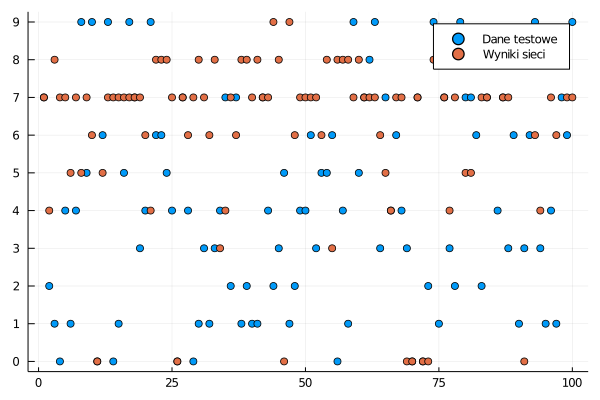

In [16]:
using Plots
x = 1:test_len
println(x)
y = test_y_dig[1:test_len]
println(length(y))
println(length(y_predicted_list))
y_data = hcat(y, y_predicted_list)
println(y_data)
plot(x,y_data, yticks = 0:1:10, seriestype = :scatter, label = ["Dane testowe" "Wyniki sieci"], lw = 10)

Błąd w kolejnych iteracjach podczas uczenia.

In [62]:
using Plots
x = 1:epochs
plot(x,E)

UndefVarError: [91mUndefVarError: epochs not defined[39m

In [37]:
poprawić alokacje na view

LoadError: [91msyntax: extra token "alokacje" after end of expression[39m